## Converting shapes into points 1: Shapes to centroids 

We've seen that two of the core objects within MuSpAn are <i>shapes</i> - for instance, representing cell boundaries - and <i>points</i> - for instance, representing cell centres. MuSpAn provides some helpful tools to convert between these types of data. In this tutorial, we'll show how we can reduce the complexity of our data by converting shapes into points.

Let's start by loading the Xenium mouse colon data, and using a query to get the cell boundaries.

MuSpAn domain loaded successfully. Domain summary:
Domain name: Xenium-Healthy-Colon
Number of objects: 74174
Collections: ['Cell boundaries', 'Nucleus boundaries', 'Transcripts']
Labels: ['Cell ID', 'Transcript Counts', 'Cell Area', 'Cluster ID', 'Nucleus Area', 'Transcript', 'Transcript ID'] 
Networks: [] 
Distance matrices: []


(<Figure size 1000x600 with 2 Axes>, <Axes: >)

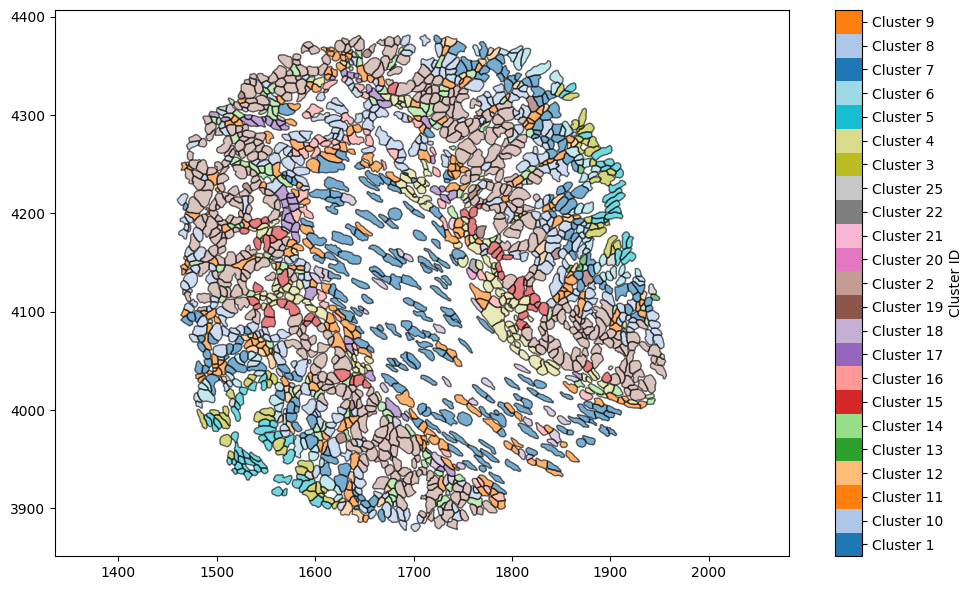

In [1]:
# Import necessary libraries
import muspan as ms
import matplotlib.pyplot as plt
import numpy as np

# Load the example domain data
domain = ms.datasets.load_example_domain('Xenium-Healthy-Colon')

# Query to get the cell boundaries
cell_boundaries = ms.query.query(domain, ('collection',), 'is', 'Cell boundaries')

# Plot the cell boundaries with color based on 'Cluster ID'
plt.figure(figsize=(10, 6))
ms.visualise.visualise(domain, ax=plt.gca(), objects_to_plot=cell_boundaries, color_by='Cluster ID')

This image shows detailed cell shapes that have been obtained from the [segmentation in Xenium explorer](https://www.10xgenomics.com/datasets/fresh-frozen-mouse-colon-with-xenium-multimodal-cell-segmentation-1-standard). While this representation of the data is useful, we may instead wish to consider these cells as cell centres rather than cell boundaries (for instance, to apply methods which require point-like data such as pair correlation function or persistent homology - see statistics tutorials). It's easy to convert a shape into its centroid, using ```domain.convert_objects()```. This will accept a list of object IDs or a query-like structure, and create new points based on the centroids of the objects passed in. Let's add these to a new collection called "Cell centres". Helpfully, new objects inherit labels from their parent objects, so we can colour these according to the 'Cluster ID' label without having to worry.

(<Figure size 1000x600 with 2 Axes>, <Axes: >)

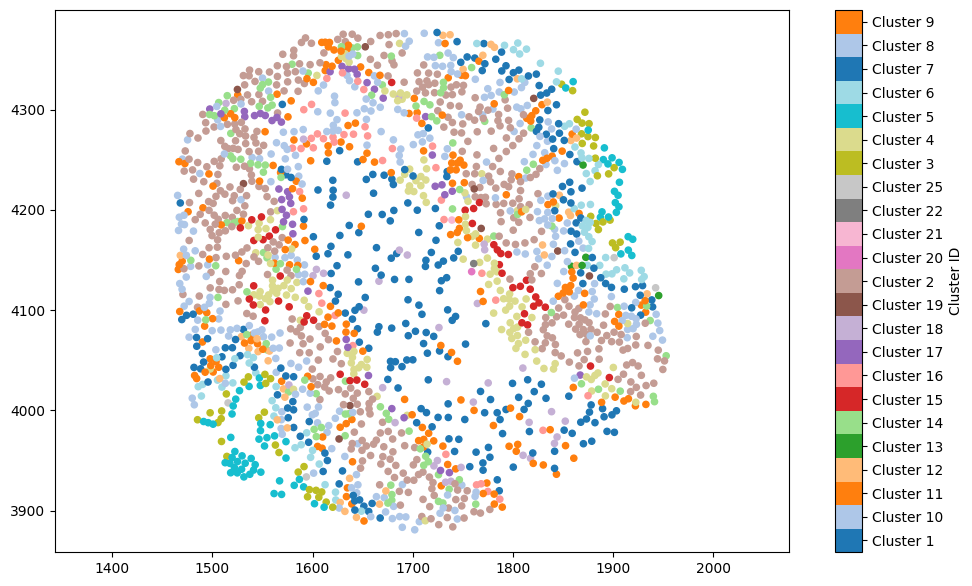

In [2]:
# Convert cell boundaries to cell centres (centroids)
domain.convert_objects(
    population=('Collection', 'Cell boundaries'),
    object_type='point',
    conversion_method='centroids',
    collection_name='Cell centres',
    inherit_collections=False
)

# Plot the cell centres with color based on 'Cluster ID'
plt.figure(figsize=(10, 6))
ms.visualise.visualise(
    domain,
    objects_to_plot=('collection', 'Cell centres'),
    color_by='Cluster ID',
    ax=plt.gca()
)

Let's combine the two plots - not for any particular MuSpAn learning purpose, but because by default the last image in the tutorial is used as the gallery image on the tutorials page and it'll look pretty.

(<Figure size 1000x600 with 2 Axes>, <Axes: >)

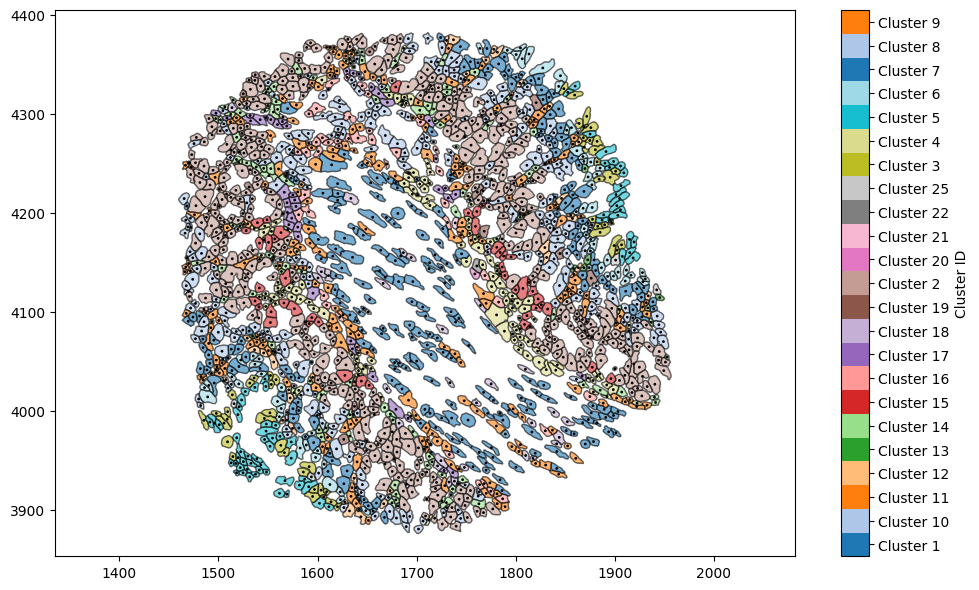

In [3]:
# Create a new figure for the combined plot
plt.figure(figsize=(10, 6))

# Plot the cell boundaries with color based on 'Cluster ID'
ms.visualise.visualise(
    domain,
    objects_to_plot=cell_boundaries,
    color_by='Cluster ID',
    ax=plt.gca()
)

# Overlay the cell centres with a constant color (black) and smaller marker size
ms.visualise.visualise(
    domain,
    objects_to_plot=('collection', 'Cell centres'),
    color_by=('Constant', 'k'),
    ax=plt.gca(),
    marker_size=1,
    add_cbar=False
)